# Detect Exoplanets with Transit Method

A transit occurs when a planet passes between a star and its observer.

## This notebook will guide you through the steps involved in detecting an Exoplanet.

This notebook can only helps in detection of exoplanets with processed and clean data.

In [1]:
from lightkurve import search_targetpixelfile
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact, Dropdown
from IPython.display import display
import json
%matplotlib inline

Enter the details of the Target 

In [2]:
tpf_name = input("Enter Target: ")

author = input("Enter Author (Kepler, K2 or SPOC): ")

cadence = input("Enter Cadence (long, short or fast): ")

quarter = input("Enter Quarter (1, 2, 3 or 4): ")

Enter Target: KIC 6922244
Enter Author (Kepler, K2 or SPOC): Kepler
Enter Cadence (long, short or fast): long
Enter Quarter (1, 2, 3 or 4): 4


In [3]:
print("Downloading Data...")
tpf = search_targetpixelfile(tpf_name, author=author,cadence=cadence, quarter=quarter).download()
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

## Target Information

In [4]:
print("""
    Mission: {}
    RA: {}
    DEC: {}
""".format(tpf.mission, tpf.ra, tpf.dec))


    Mission: Kepler
    RA: 281.28812
    DEC: 42.45108



## Target Image

Target Pixel File Plot of KIC 6922244


<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

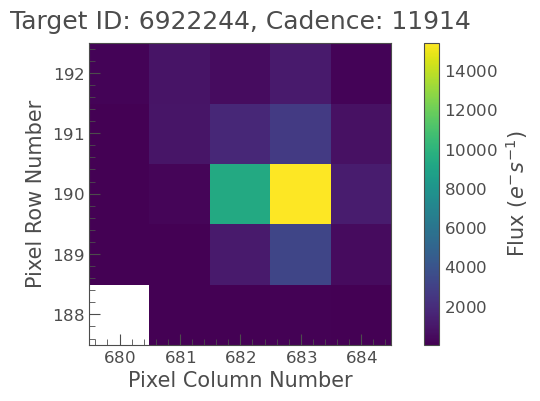

In [5]:
print("Target Pixel File Plot of {}".format(tpf_name))
tpf.plot()

## Light Curve Plot

Light curve of KIC 6922244


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

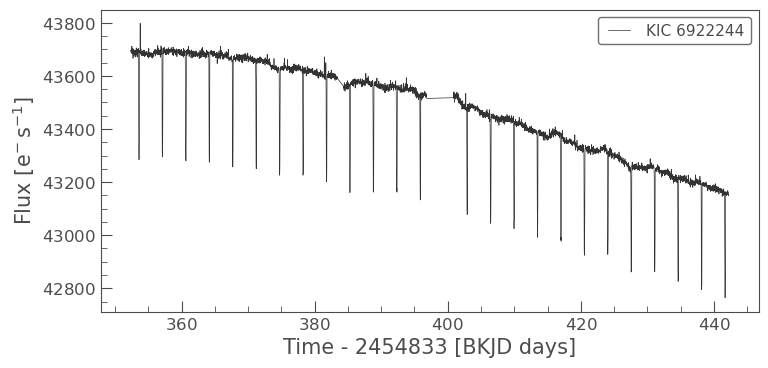

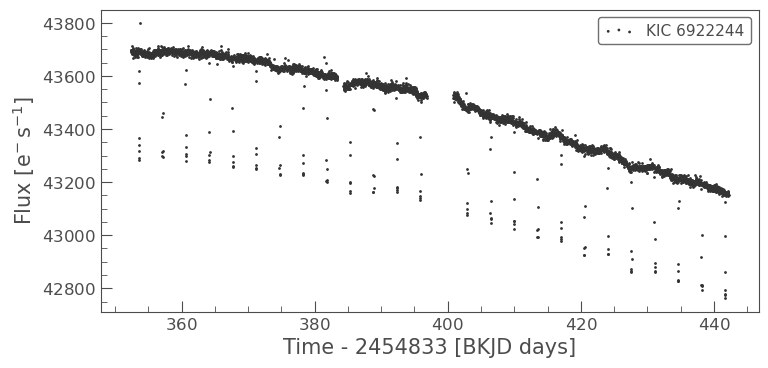

In [6]:
print("Light curve of {}".format(tpf_name))
lc.plot()
lc.scatter()

### Flatten plot

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

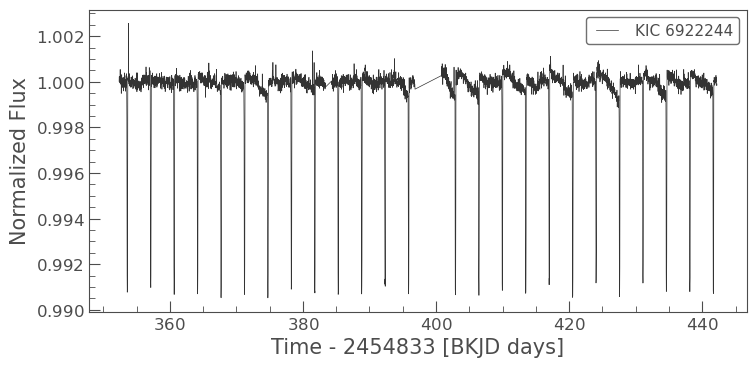

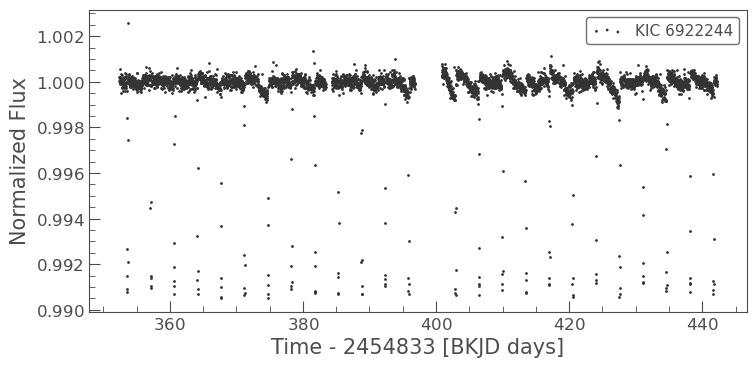

In [7]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()
flat_lc.scatter()

If you see some sort of dips in flux in this graphs periodically, that means the target star has an exoplanet orbiting around it.

## Orbital Time Period

Now, we need to calculate the time this planet takes to complete it's orbit.

For this we will use periodogram. 
A periodogram is used to identify the dominant periods (or frequencies) of a time series

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

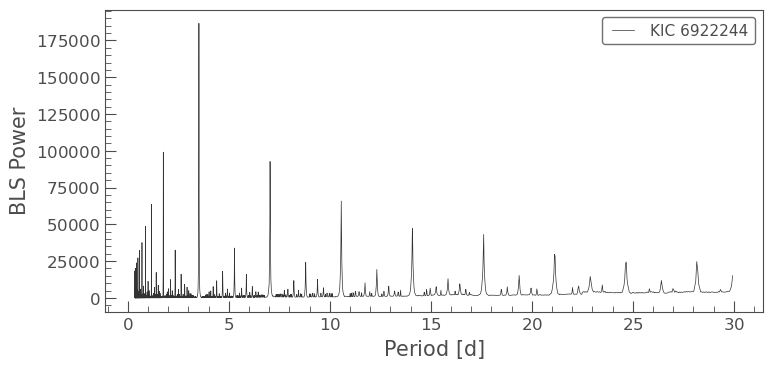

In [8]:
periodogram = flat_lc.to_periodogram(method='bls')
periodogram.plot()

You can see the figure that for some value of period BLS (Box Least Square) Power is highest.

In [9]:
periodogram.period_at_max_power

<Quantity 3.52274772 d>

This is the time period of the orbit.

## Transit

Now we will divide the light curve into equal parts (same as the time period) and stack every part on each other.

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

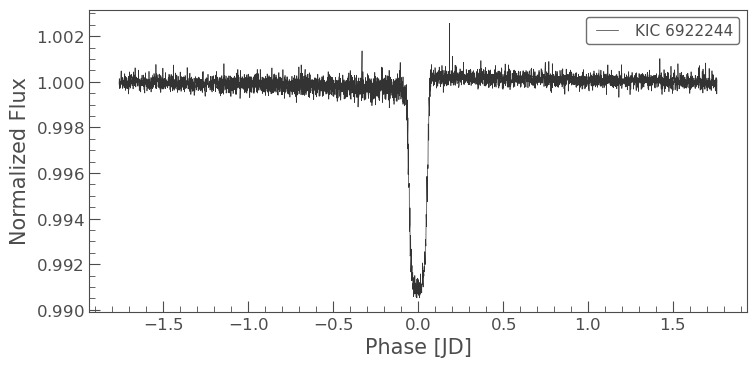

In [10]:
folded_lc = flat_lc.fold(period=3.52274, epoch_time=periodogram.transit_time_at_max_power)
folded_lc.plot()

/tmp/ipykernel_47288/2497422396.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=4)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

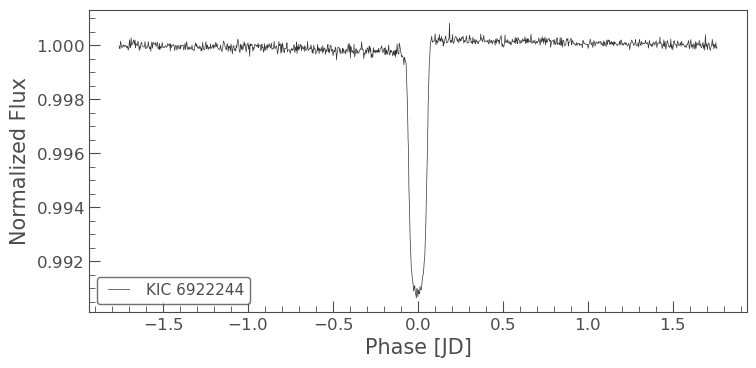

In [11]:
binned_lc = folded_lc.bin(binsize=4)
binned_lc.plot()

## This was a basic way to detect exoplanet and calculate its time period. Although this not 100% efficient but can explain the Transit Method.